## KNN (K Nearest Neighbor) Classifier for digit image classification

In [10]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
#we need the image dataset from tensorflow
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Load the data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0].min()

0

In [9]:
x_train[0].max()

255

In [10]:
x_train[0].dtype

dtype('uint8')

### Preprocess the data
normalize the value of every pixel into the range of 0 to 1

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
x_train[0].min()

0.0

In [13]:
x_train[0].max()

1.0

reshape each image (2D array) into a vector (1D array)

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


### Show the digit images

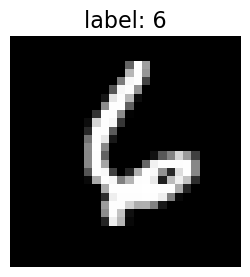

<Figure size 640x480 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

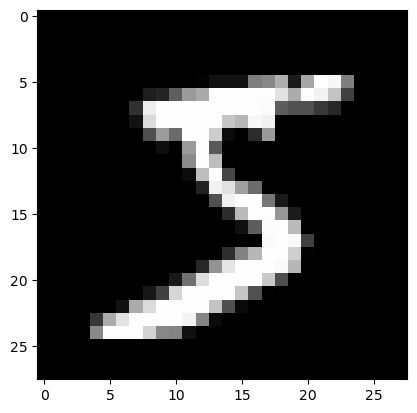

In [16]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [17]:
#the class label of the first training sample
y_train[0]

5

### Build a KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# instance of the classifier
model = KNeighborsClassifier(n_neighbors = 5)

In [19]:
import time

### Train the model on the training set: x_train, y_train

In [20]:
t_start = time.time()
model.fit(x_train, y_train)
t_end=time.time()

In [21]:
print('training time cost (seconds):', t_end-t_start)

training time cost (seconds): 0.07983922958374023


### Evaluate the model on the test set

In [22]:
x_test.shape

(10000, 784)

In [23]:
y_test.shape

(10000,)

take a subset

In [24]:
x_test1=x_test[::100]
y_test1=y_test[::100]

In [25]:
t_start = time.time()
y_test1_pred=model.predict(x_test1)
t_end=time.time()
print('test time cost (seconds):', t_end-t_start)

test time cost (seconds): 0.6361846923828125


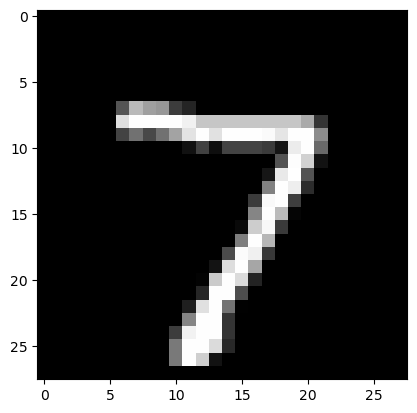

In [26]:
#the first image in the test set
plt.imshow(x_test1[0].reshape(28,28), cmap='gray')

In [27]:
y_test1_pred[0]

7

In [28]:
np.argmax(y_test1_pred[0])

0

In [29]:
y_test1[0]

7

In [30]:
np.argmax(y_test1[0])

0

measure test accuracy

In [31]:
acc_test = np.sum(y_test1_pred == y_test1)/y_test1.shape[0]
print('Test accuracy:', acc_test)

Test accuracy: 0.96


## Classifiy an image from the user

In [32]:
# load  the image digit_a
from skimage.io import imread
from skimage.color import rgb2gray
I=imread('digit_a.bmp')
I=rgb2gray(I)
I.shape

(30, 27)

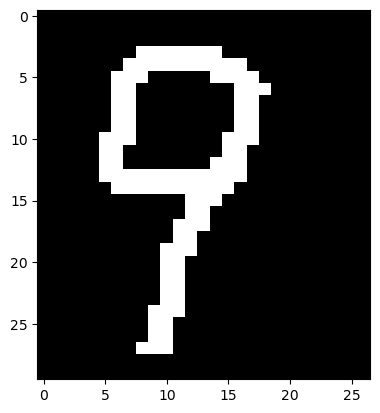

In [33]:
plt.imshow(I, cmap='gray')

In [34]:
#resize the image to 28x28
from skimage.transform import resize
x=resize(I, [28,28])
x.shape

(28, 28)

In [35]:
x.max()

1.0

In [36]:
y_pred=model.predict(x.reshape(1,784))
print('the predicted class label is ', y_pred[0])

the predicted class label is  1


In [37]:
y_pred

array([1], dtype=uint8)